In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
import collections

# This allows chinese characters to show up in figures. 
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

In [ ]:
# Import data
raw = pd.read_csv("event-pycontw2016-ocf-attendees-20180510-235011-rm-personal-identity.csv")
raw.head()

In [3]:
# Show number of attendees
len(raw)

378

In [ ]:
# Extract target contents
data = raw.iloc[:,10:14]
data.head()

In [ ]:
# Rename columns
data.rename(index=str, columns=
            {data.columns.values[0]:"nationality",
             data.columns.values[1]:"gender",
             data.columns.values[2]:"company",
             data.columns.values[3]:"job_title",
            }, inplace=True)
data.head()

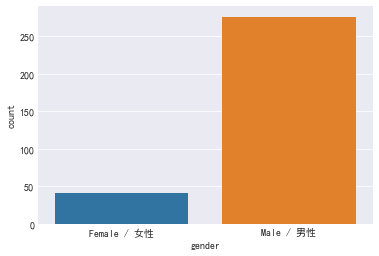

In [6]:
# Plot genders
sns.countplot(x='gender', data=data)

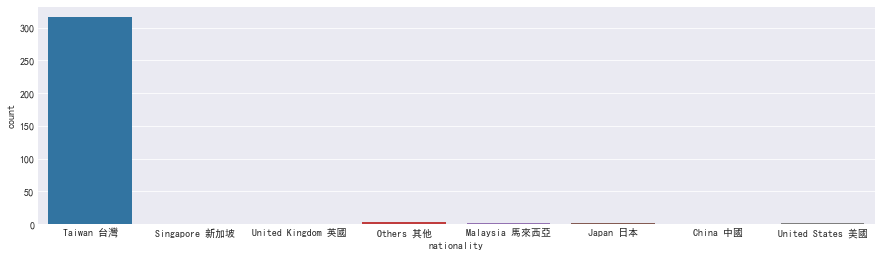

In [7]:
# Plot nationalities
plt.subplots(figsize=(15,4))
sns.countplot(x='nationality',data=data)

In [8]:
# Count companies
print('Company count:', len(data['company'].unique()), '\n')
print(data['company'].value_counts()[0:9],'\n')

# Show all unique companies
print(data['company'].unique())

Company count: 157 

Appier         7
QNAP           5
Trend Micro    5
中央研究院          3
Mediatek       3
杭特電子股份有限公司     3
Vynca          3
NUUO Inc.      3
Synology       3
Name: company, dtype: int64 

['京晨' nan 'Trend Micro' 'Infortrend' 'athentek' 'Athentek' 'NUUO Inc.'
 'Lbstek' 'Allion Labs Inc.' 'TrendMicro' 'Trend Micro, Inc.' '小小胖有限公司'
 'IBM' 'Vynca' '誠致教育基金會' '野生叢林股份有限公司' 'Trendmicro' 'Promise Tech.' '台達電子'
 'ITRI' 'pinkoi' 'Entegris' 'Vivotek' 'Synology Inc.' 'Synology' '晶睿通訊'
 'AFOP' 'foundi.info' '程沛' 'Kono Digital Inc.' 'Sixnology' 'Micron'
 'Tiger Party' '朝陽科技大學' 'IISI' 'KosmosBanking' 'NCCST' '木刻思股份有限公司' '大數軟體'
 'A10 Networks' '政治大學應用數學系' 'oneplus' 'Lilee' '和沛科技' 'ASIAA'
 'FATEK Automation' '科盛科技 Moldex3D' 'LINE Taiwan' 'Syscom'
 'Muvee Technologies Pte Ltd' 'YAHOO' 'Toshiba' '台灣卡普空' '均一教育平台'
 'Academia Sinica' 'Cepave' 'Hualun Technology Co., Ltd.' 'QNAP'
 'TutorABC' 'trendmicro' '國立陽明大學' 'Soho' 'gnoon soft' 'yam' 'ProphetStor'
 'Appier' 'Canonical' 'Marvell' 'Hardcore

In [9]:
# Count job titles
print('Job titles count:', len(data['job_title'].unique()), '\n')
print(data['job_title'].value_counts()[0:9],'\n')

# Show all unique job titles
print(data['job_title'].unique())

Job titles count: 111 

Engineer             16
Software Engineer    14
工程師                  14
軟體工程師                 8
RD                    7
Senior Engineer       5
學生                    4
資深工程師                 3
Developer             3
Name: job_title, dtype: int64 

[nan 'Sr. Engineer' 'RD' 'Senior Engineer' 'R&D Section Manager'
 'backend engineer' '軟體工程師' 'Engineer' 'swRD' 'Software Engineer'
 'Senior Software Engineer' '資深軟體工程師' 'R&D' '共同創辦人' 'Staff engineer'
 'R&D Engineer' 'Senior System Developer' '資深研發工程師' 'data engineer'
 'System Engineer' 'Product Developer' 'Product Manager' 'Operator'
 'Software Eng' '工程師' 'Machine Learning Engineer' '副教授' '資安工程師'
 'Consultant' '伴讀書僮' 'CEO' 'engineer' 'Software engr.' '資深工程師' 'Postdoc'
 '軟體驗證工程師' 'Sofeware Engineer' 'Production Engineer' 'Research Assitant'
 '資深新手' 'Sales' 'Senior Specialist' '學生' 'IoT/M2M Architect' '主任工程師'
 'Performance engineer' '助理研究員' '資料工程師' 'eng' 'SW engineer' 'Developer'
 '資訊人員' '副教務長' '技正' 'CMO' 'HR' 'SoftwareE

In [10]:
# Build a function to categorize attendees with job titles and company names
def cat_job(data):
    title = str(data['job_title'])
    company = str(data['company'])
    
    ## job title pattern dictionary
    # The first listed will be categorized last, so there is an ascending priority here
    pd_title = collections.OrderedDict()
    pd_title['freelancer'] = "(?i)self[ -]employed|freelancer"
    pd_title['consultant'] = "(?i)consultant|顧問"
    pd_title['other manager'] = "(?i)manager|C.O|supervisor|PM|founder|經理|.*長$|總裁|管理師|創辦人"
    # to be fixed: I failed to detect 'xx長' with the expression ".*長$"
    pd_title['other engineer'] = "(?i)engineer|eng|developer|analyst|工程師|分析師"
    # to be improved: eng
    pd_title['sales'] = "(?i)sales"
    pd_title['R&D'] = "(?i)rd|r&d|research and development|研發"
    pd_title['IT'] = "(?i)information|software|sw|soft|backend|data|system|network|machine learning|android|ios|iot|F2E|"\
                     "FAE|AP|programmer|automation|cloud|前端|程式|資訊|軟體|韌體|資安|系統|自動化|sofeware"
    # to be improved: iot, ios, ap (you'll get 'idiot', 'adios', etc.)
    pd_title['academia'] = "(?i)postdoc|professor|教務"
    pd_title['government'] = "技正"
    # This is to categorize 技正 working in public research institutes into "government" instead of "academia"
    pd_title['student'] = "(?i)student|學生"
    
    ## company pattern dictionary
    pd_company = collections.OrderedDict()
    pd_company['government'] = "委會"
    # to categorize everyone else working in the governmental organizations into "government"
    pd_company['academia'] = "(?i)university|academia|大學|學院|研究院|研院|中科院"
    # to categorize everyone else working in reserach institutes into "academia"
    
    # to run categorization with job titles
    job_cat = ''
    for pattern in pd_title:
        if re.search(pd_title[pattern], title) is not None:
            job_cat = pattern
        else:
            pass
    # for those uncategorized, run categorization with companies
    for pattern1 in pd_company:
        if re.search(pd_company[pattern1], company) is not None and job_cat == '':
            job_cat = pattern1
                
    return job_cat

In [11]:
# Test cat_job function
co = ''
job = 'cool' # For example job title 'cool' would be a failed case
testset = {'company':[co], 'job_title':[job]}
cat_job(testset)

'other manager'

In [ ]:
# Categorize attendees using cat_job function
data['job_category'] = data.apply(cat_job, axis=1)

# Check uncategorized attendees (to see whether it is fair to mark them all as "others")
data[data['job_title'].isna() == False][data['job_category'] == '']

In [ ]:
# Extract attendees data with job titles (i.e. discard those rows without job titles)
data1 = data[data['job_title'].isna() == False]

# Categorize the uncategorized report_generatorndees in data1 into "others"
data1.loc[data1['job_category']=='','job_category'] = 'others'
data1.head()

In [14]:
# Number of attendees with job titles
len(data1)

182

In [15]:
# Count job categories
data1['job_category'].value_counts()

IT                67
other engineer    58
others            14
R&D               13
academia          11
other manager      9
student            4
government         2
sales              2
freelancer         1
consultant         1
Name: job_category, dtype: int64

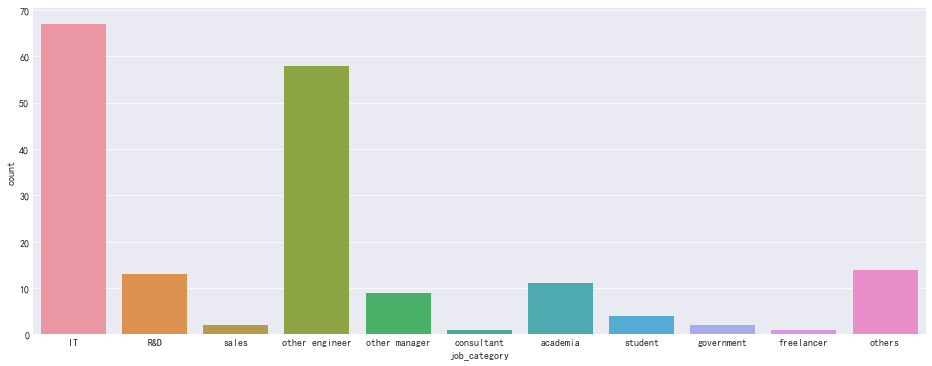

In [16]:
# Plot job categories 
plt.subplots(figsize=(16,6))
sns.countplot('job_category', data=data1, 
              order=['IT','R&D','sales','other engineer','other manager','consultant','academia','student',
                     'government','freelancer','others'])

In [ ]:
# Check job categories
cat = 'academia'
data1[data1['job_category']== cat]